In [3]:
#These are solutions to selected problems from Downey's ThinkStats2 textbook
#Just a standard preamble
import numpy as np
import pandas as pd
import math
import nsfg
import first
import thinkplot
import thinkstats2

*******

**Exercise 2.4** Using the variable *totalwgt_lb*, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [26]:
#Chapter 2, Exercise 4
#Effect size of Cohen's 'D'
#--------------------------------

def ReadFemPreg(dct_file='2002FemPreg.dct', dat_file='2002FemPreg.dat.gz'):
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip') 
    CleanFemPreg(df)
    return df

#Cohen's D statistic: compares the difference between groups to the variability within groups.
def CohenEffectSize(group1, group2): 
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2) 
    d = diff / math.sqrt(pooled_var)
    return d

#Take the data and extract only live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

#Create two groups of first borns and others 
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

#Just to compare mean values straight up in ounces:
print(math.fabs(firsts.totalwgt_lb.mean()-others.totalwgt_lb.mean()) *16)


#Calculate the Cohen D statistic:
CohenEffectSize(firsts.totalwgt_lb,others.totalwgt_lb)

1.9961789525678455


-0.088672927072602

**Exercise 2.4 Analysis:** While the mean weight of first births are slightly lower by about 2 ounces, it appears that this is not a statistically significant result given the Cohen statistic. We have quantified that the difference in means is below 0.1 standard deviations apart. This puts the significance under the category of "small" indicated by Cohen's guide. It is however, slightly more significant than the difference in pregnancy length calculated in the textbook to be 0.029.

***

**Exercise 3.1** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable *numkdhh* to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb.

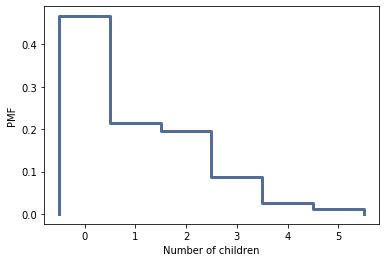

In [12]:
#Chapter 3, Exercise 1
#Actual vs. Biased
#--------------------------------

#Actual Distribution

resp = nsfg.ReadFemResp()
pmf = thinkstats2.Pmf(resp.numkdhh)
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

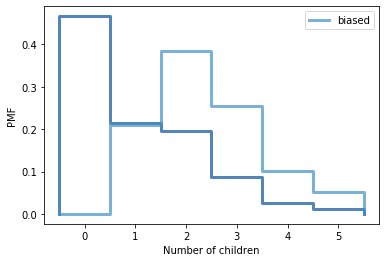

In [14]:
#Biased Distribution 

#Function to quantify bias
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items(): 
        new_pmf.Mult(x, x)
        new_pmf.Normalize() 
    return new_pmf

biased = BiasPmf(pmf, label='biased')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [19]:
#Comparing Means:
print(pmf.Mean())
print(biased.Mean())

1.024205155043831
2.4036791006642817


**Exercise 3.1 Analysis:** As we anticipated, our probability mass functions and the means of the two means are significantly different. The bias skews the number of children heavily when only accounting for what the different children observe. When that number is multiplied by zero (the number of children observing), a large portion of the actual distribution is unaccounted for which explains the extreme bias. 

***

**Exercise 4.2** The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

In [ ]:
#Chapter 4, Exercise 2
#Random Distribution
#--------------------------------

In [4]:
dist = np.random.random(1000)

{'xscale': 'linear', 'yscale': 'linear'}

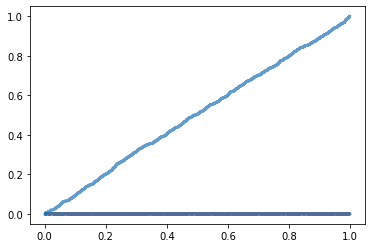

In [10]:
pmf = thinkstats2.Pmf(dist)
cdf = thinkstats2.Cdf(dist)
thinkplot.pmf(pmf)
thinkplot.cdf(cdf)

**Exercise 4.2 Analysis:** It would appear that the distribution is in fact uniform. Looking at the pmf, it appears that almost every data point is unique and clustered, making it hard to tell. Then, we need to examine the cdf to confirm a straight line representing a uniform distribution. 

***

**Exercise 5.1:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters μ = 178 cm and σ = 7.7 cm for men, and μ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.

In [5]:
#Chapter 5, Exercise 1
#Normal Distribution of Blue Men
#--------------------------------
import scipy.stats
lower = scipy.stats.norm.cdf(177.8, loc = 178, scale = 7.7)
upper = scipy.stats.norm.cdf(185.42, loc = 178, scale = 7.7)
upper-lower

0.3427468376314737

**Exercise 5.1 Analysis:** The percentage of the population elegible for the Blue Man Group is 34.27%. We calculate this by the percentage of the population under 6'1'' minus the percentage of the population shorter than 5'10''. This should be easy to verify because 5'10'' is about the mean and 6'1'' is about one standard deviation above the mean. From the 64-95-99.7 rule, an eye-balled guess would be about 32%. 

***

**Question 5: Bayesian (Elvis Presley Twin)**
Bayes' Theorem is an important tool in understanding what we really know, given evidence of other information we have, in a quantitative way. It helps incorporate conditional probabilities into our conclusions. Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin? Assume we observe the following probabilities in the population: fraternal twin is 1/125 and identical twin is 1/300.

In [9]:
prob_frat = 1/125
prob_iden = 1/300

#Now we consider just boy-boy pairs
prob_iden_BB = prob_iden * 1/2
prob_frat_BB = 1/125 * 1/4

In [11]:
#We want the conditional probability that elvis was an identical twin, GIVEN that his twin was a boy. 
prob_iden_BB/(prob_frat_BB+prob_iden_BB)

0.45454545454545453

**Question 5 Analysis:** So the probability that elvis was an identical twin is about 45%. The key to understanding this problem is the conditions that you are given his twin was a boy. 